# Daniel Carrillo's Jupyter Notebook

Dependencies

In [1]:
# STANDARD
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# SKYLEARN
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# DUMMY ENCODING
import warnings
warnings.simplefilter('ignore')



1. Section to load data

In [2]:
# dropped annual and quarterly
df = pd.read_csv('data/all_data.csv')
df.head()

,Date,CS_Mnth,CS_Qtr,CS_Ann,CD_Mnth,CD_Qtr,CD_Ann,Enrgy_Mnth,Enrgy_Qtr,Enrgy_Ann,...,PPI_Commodity,Imp_Exp _Indx,haircut_price,cardboard_pice,Superbowl,Cosmetics_index,bodies,unidentified_bodies,underwear,beer_prct_change
0,12/1/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,91.0,102.7,166.5,AFC,160.8,2.0,17,NaN,0.8
1,1/1/1999,0.0580,NaN,NaN,0.0333,NaN,NaN,-0.0013,NaN,NaN,...,NaN,91.3,103.0,165.0,AFC,162.1,3.0,24,NaN,-1.1
2,2/1/1999,-0.0143,NaN,NaN,0.0550,NaN,NaN,-0.0631,NaN,NaN,...,NaN,91.2,103.3,164.5,AFC,162.1,1.0,17,NaN,0.6
3,3/1/1999,-0.0208,0.0211,NaN,-0.0136,0.0753,NaN,-0.0064,-0.0704,NaN,...,NaN,91.5,103.7,164.6,AFC,163.6,1.0,16,NaN,-0.6
4,4/1/1999,0.0112,-0.0240,NaN,0.0563,0.0992,NaN,0.1363,0.0577,NaN,...,NaN,92.4,103.9,171.3,AFC,163.0,4.0,19,NaN,3.4


3. Data pre-processing (convert to binary using Dummy Encoding)

In [3]:

# X = df[["column1", "column2", "column3"]]
# y = df["weight"].values.reshape(-1, 1)
# print(X.shape, y.shape)

# data = X.copy()

# data_binary_encoded = pd.get_dummies(data)
# data_binary_encoded.head()

4. Scale and normalize

In [4]:
# X = pd.get_dummies(X)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# X_train.head()


# // STANDARD SCALER
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [5]:
# Add new column, "Buy"/"Sell" function
nfl = []

for x in df["Superbowl"]:
    if x == 'AFC':
        fb = 0
        nfl.append(fb)
    elif x == 'AFL':
        fb = 1
        nfl.append(fb)
    elif x == 'NFC':
        fb = 3
        nfl.append(fb)
    
df["Superbowl"] = nfl


In [6]:
df.head(20)

,Date,CS_Mnth,CS_Qtr,CS_Ann,CD_Mnth,CD_Qtr,CD_Ann,Enrgy_Mnth,Enrgy_Qtr,Enrgy_Ann,...,PPI_Commodity,Imp_Exp _Indx,haircut_price,cardboard_pice,Superbowl,Cosmetics_index,bodies,unidentified_bodies,underwear,beer_prct_change
0,12/1/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,91.0,102.7,166.5,0,160.8,2.0,17,NaN,0.8
1,1/1/1999,0.0580,NaN,NaN,0.0333,NaN,NaN,-0.0013,NaN,NaN,...,NaN,91.3,103.0,165.0,0,162.1,3.0,24,NaN,-1.1
2,2/1/1999,-0.0143,NaN,NaN,0.0550,NaN,NaN,-0.0631,NaN,NaN,...,NaN,91.2,103.3,164.5,0,162.1,1.0,17,NaN,0.6
3,3/1/1999,-0.0208,0.0211,NaN,-0.0136,0.0753,NaN,-0.0064,-0.0704,NaN,...,NaN,91.5,103.7,164.6,0,163.6,1.0,16,NaN,-0.6
4,4/1/1999,0.0112,-0.0240,NaN,0.0563,0.0992,NaN,0.1363,0.0577,NaN,...,NaN,92.4,103.9,171.3,0,163.0,4.0,19,NaN,3.4
5,5/1/1999,-0.0363,-0.0457,NaN,0.0228,0.0657,NaN,0.1472,0.2951,NaN,...,NaN,93.1,104.4,174.8,0,163.5,1.0,23,NaN,-0.8
6,6/1/1999,-0.0176,-0.0426,NaN,-0.0457,0.0310,NaN,-0.0243,0.2718,NaN,...,NaN,92.9,104.3,177.2,0,165.8,3.0,26,NaN,-1.5
7,7/1/1999,0.0148,-0.0392,NaN,0.0535,0.0283,NaN,0.0204,0.1421,NaN,...,NaN,93.8,104.6,174.9,0,164.8,2.0,11,NaN,1.1
8,8/1/1999,-0.0390,-0.0419,NaN,-0.0645,-0.0595,NaN,0.0094,0.0050,NaN,...,NaN,94.8,104.9,183.1,0,165.7,NaN,35,NaN,0.1
9,9/1/1999,0.0127,-0.0124,NaN,-0.0367,-0.0507,NaN,0.0176,0.0482,NaN,...,NaN,95.8,105.0,190.5,0,168.0,1.0,28,NaN,1.6


5. Linear or non-linear regression models here (testing/training and predictions).
    A simple linear model could be used for stock price predictions.

In [7]:
# df = pd.read_csv('data/all_data.csv')
df.head()
df.fillna(0,inplace=True)

In [8]:
df.corr()

,CS_Mnth,CS_Qtr,CS_Ann,CD_Mnth,CD_Qtr,CD_Ann,Enrgy_Mnth,Enrgy_Qtr,Enrgy_Ann,Fncl_Mnth,...,PPI_Commodity,Imp_Exp _Indx,haircut_price,cardboard_pice,Superbowl,Cosmetics_index,bodies,unidentified_bodies,underwear,beer_prct_change
CS_Mnth,1.000000,0.552069,0.247979,0.607939,0.324033,0.180381,0.428523,0.244905,0.083775,0.616143,...,0.095753,0.113197,0.080391,0.076507,0.007354,0.076344,-0.065096,-0.036411,0.081080,0.089817
CS_Qtr,0.552069,1.000000,0.438486,0.297031,0.605289,0.326324,0.176023,0.399550,0.145740,0.347469,...,0.180100,0.219369,0.154214,0.139423,0.043901,0.162744,-0.096212,0.006205,0.184825,0.047105
CS_Ann,0.247979,0.438486,1.000000,0.103243,0.226239,0.659549,0.062286,0.165378,0.411542,0.093648,...,0.413091,0.446037,0.272889,0.284667,-0.100621,0.334487,0.021966,0.082876,0.381020,0.078528
CD_Mnth,0.607939,0.297031,0.103243,1.000000,0.490941,0.250095,0.555899,0.224981,0.018717,0.795827,...,0.104886,0.039989,0.073738,0.065842,-0.066795,0.051585,-0.084048,-0.011125,0.039384,0.131659
CD_Qtr,0.324033,0.605289,0.226239,0.490941,1.000000,0.437021,0.276030,0.508341,0.037335,0.443396,...,0.198292,0.103270,0.140860,0.120927,-0.067807,0.116418,-0.083782,0.001451,0.098243,0.013956
CD_Ann,0.180381,0.326324,0.659549,0.250095,0.437021,1.000000,0.130313,0.233743,0.366931,0.204192,...,0.506043,0.302796,0.264201,0.279715,0.020263,0.291008,-0.008609,0.058309,0.279996,0.030413
Enrgy_Mnth,0.428523,0.176023,0.062286,0.555899,0.276030,0.130313,1.000000,0.537568,0.296840,0.565816,...,-0.078249,-0.019082,-0.115217,-0.115447,-0.025504,-0.067535,-0.274539,-0.058554,-0.037124,0.167648
Enrgy_Qtr,0.244905,0.399550,0.165378,0.224981,0.508341,0.233743,0.537568,1.000000,0.481950,0.325187,...,-0.130142,0.006049,-0.193658,-0.200354,-0.004161,-0.114148,-0.363315,-0.055005,-0.059580,-0.009197
Enrgy_Ann,0.083775,0.145740,0.411542,0.018717,0.037335,0.366931,0.296840,0.481950,1.000000,0.064085,...,-0.188243,0.105527,-0.289665,-0.272111,0.144082,-0.179515,-0.375286,-0.084392,-0.019868,0.011751
Fncl_Mnth,0.616143,0.347469,0.093648,0.795827,0.443396,0.204192,0.565816,0.325187,0.064085,1.000000,...,0.057926,0.000145,0.008281,0.013403,-0.059732,0.016760,-0.151909,-0.000421,-0.001584,0.088722


In [9]:
df['underwear']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
258    148.6
259    148.6
260    148.6
261    150.4
262    150.7
Name: underwear, Length: 263, dtype: float64

In [10]:
# Assign the data to X and y
X = df[["CS_Mnth"]]
y = df["haircut_price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(263, 1) (263, 1)


In [11]:
#  train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
#  model
model = LinearRegression()

In [13]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.0015124397667015677
Testing Score: 0.014095816928838099


Text(0.5, 1.0, 'Residual Plot')

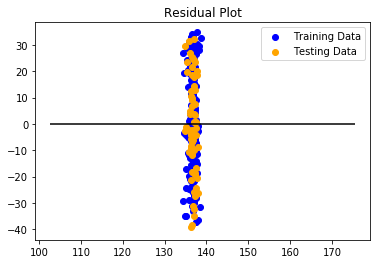

In [14]:
# plot model
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")